In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Importando o dataset

In [4]:
dados_heart = pd.read_csv('./dataset/heart.csv',
            sep=',')

# Informações do dataset

In [5]:
dados_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       342 non-null    int64  
 1   sex       342 non-null    int64  
 2   cp        342 non-null    int64  
 3   trtbps    342 non-null    int64  
 4   chol      342 non-null    int64  
 5   fbs       342 non-null    int64  
 6   restecg   342 non-null    int64  
 7   thalachh  342 non-null    int64  
 8   exng      342 non-null    int64  
 9   oldpeak   342 non-null    float64
 10  slp       342 non-null    int64  
 11  caa       342 non-null    int64  
 12  thall     342 non-null    int64  
 13  output    342 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 37.5 KB


# Estatistica do dataset

In [6]:
dados_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,54.380117,0.695906,0.926901,132.157895,245.880117,0.154971,0.532164,148.643275,0.350877,1.059649,1.383041,0.730994,2.347953,0.500000
std,9.094258,0.460696,1.031999,17.758520,51.725706,0.362407,0.528224,23.059561,0.477944,1.155712,0.614635,1.017806,0.625915,0.500733
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.500000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,164.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Quantos registro igual a 0 na coluna THALL

In [8]:
dados_thall_zero = dados_heart[dados_heart['thall'] == 0]
print(len(dados_thall_zero))

3


In [9]:
#exclui os dados 
dados_heart = dados_heart[dados_heart['thall'] != 0]

In [10]:
dados_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Registros duplicados

In [11]:
dados_heart[dados_heart.duplicated()].count()

age         39
sex         39
cp          39
trtbps      39
chol        39
fbs         39
restecg     39
thalachh    39
exng        39
oldpeak     39
slp         39
caa         39
thall       39
output      39
dtype: int64

In [12]:
#REMOVE LINHAS DUPLICADAS
dados_heart.drop_duplicates(inplace=True)

In [13]:
dados_heart[dados_heart.duplicated()].count()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [14]:
dados_thall_zero = dados_heart[dados_heart['thall'] == 0]
print(len(dados_thall_zero))

0


In [15]:
dados_heart.groupby(['output'])['output'].count()


output
0    137
1    163
Name: output, dtype: int64

# Balanceamento dos dados

In [16]:
x_dados = dados_heart.drop('output', axis=1).values #todos atributos menos a variavel label
y_dados = dados_heart['output'].values # os labels diabeticos ou n diabeticos

In [17]:
def balanceamento_dados(x_dados, y_dados):
    undersampler = RandomUnderSampler(random_state=42)
    x_under, y_under = undersampler.fit_resample(x_dados, y_dados)
    tl = TomekLinks(sampling_strategy='all')
    x_under, y_under = tl.fit_resample(x_under, y_under)
    return x_under, y_under

In [18]:
# aplicando a técnica de balenceamento de dados

x_dados_balanceados, y_dados_balanceados = balanceamento_dados(x_dados, y_dados)

In [19]:
print(len(x_dados_balanceados), len(y_dados_balanceados))

214 214


In [20]:
import collections 
print(collections.Counter(y_dados_balanceados))

Counter({0: 107, 1: 107})


In [21]:
# Separando dados para testes e treino

In [22]:
def separa_treino_teste(x_dados_balanceados, y_dados_balanceados):
    x_train, x_test, y_train, y_test = train_test_split(x_dados_balanceados,y_dados_balanceados, random_state=42, test_size=0.2)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = separa_treino_teste(x_dados_balanceados, y_dados_balanceados)

In [23]:
from sklearn.ensemble import RandomForestClassifier

#criar o classificador random forest

classifier = RandomForestClassifier(random_state=42)

#cria modelo de classificação
modelo = classifier.fit(x_train, y_train)

# Realiza predições
y_pred = modelo.predict(x_test)

In [24]:
pd.DataFrame(modelo.feature_importances_, columns=['importancia'],
             index= ['age', 'sex', 'cp', 'trtbps', 'chol',
                     'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']).sort_values('importancia', ascending=False)

,importancia
thalachh,0.172376
caa,0.139728
cp,0.112541
thall,0.102451
age,0.096566
oldpeak,0.092364
slp,0.083797
chol,0.059800
trtbps,0.055220
exng,0.035672


In [25]:
print("Quantidade de registros selecionados para teste: ", len(x_test))
print("Quantidade de registros selecionados para treinamento:", len(x_train))


Quantidade de registros selecionados para teste:  43
Quantidade de registros selecionados para treinamento: 171


In [26]:
# Calculando a acuracia do modelo

acuracia = accuracy_score(y_test, y_pred)
print('Precisão: ', acuracia)


Precisão:  0.7674418604651163


C:\Users\lorai\AppData\Local\Temp\ipykernel_26356\4048751744.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(data=dados_heart,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


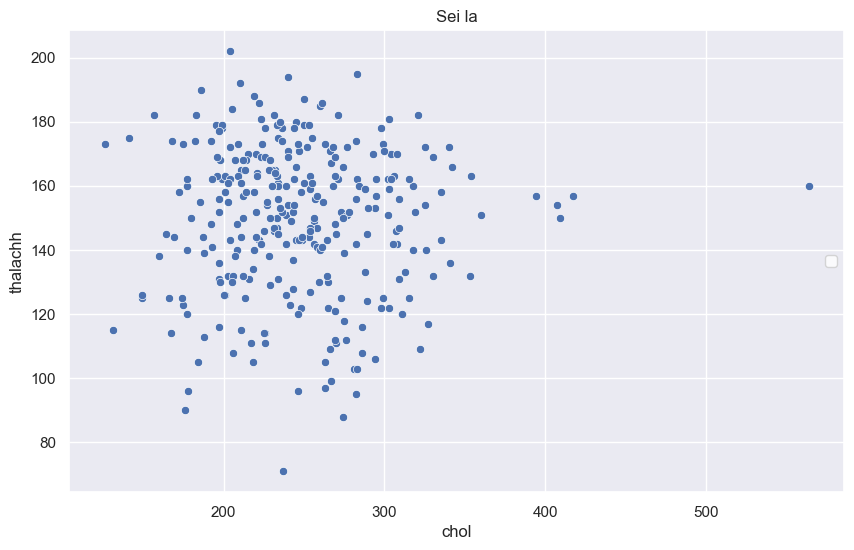

In [27]:
# Criando Scatter Plot
sns.set(style='darkgrid')    # Ajuste opcional para um fundo branco com linhas de grade
plt.figure(figsize=(10, 6))  # Ajuste opcional para o tamanho do gráfico
 
# Scatter Plot com legenda na parte superior direita e cores personalizadas
scatter_plot = sns.scatterplot(data=dados_heart, 
                               x='chol', #colesterol 
                               y='thalachh', 
                               #hue='nome_cluster', 
                               palette={'Risco Baixo': 'green', 
                                        'Risco Moderado': 'orange', 
                                        'Risco Alto': 'red'})
 
# Adicionando legenda na parte superior direita com fundo branco
scatter_plot.legend(loc='center right', facecolor='white')
 
# Nomeando o gráfico
plt.title('Sei la')
 
# Exibindo o gráfico
plt.show()

# Matriz de confusão

In [28]:
cm = confusion_matrix(y_test, y_pred)

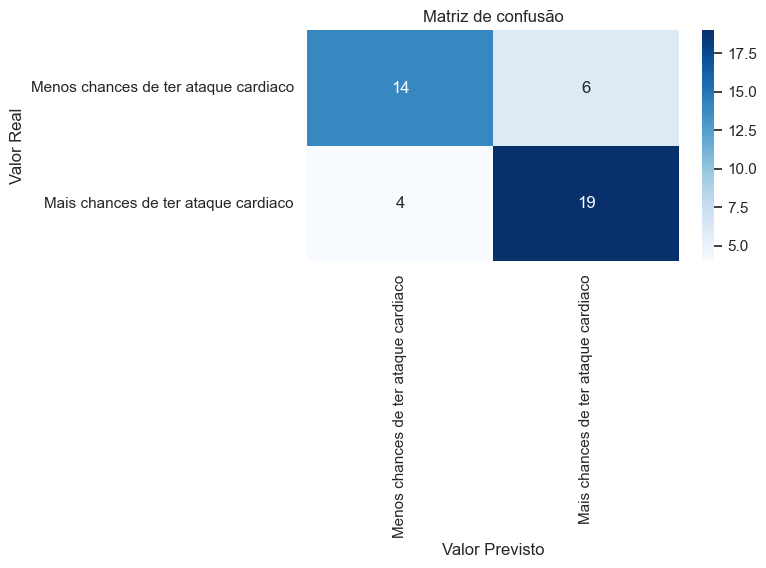

In [29]:
# Visualizando matriz de confusão
labels=['Menos chances de ter ataque cardiaco', 'Mais chances de ter ataque cardiaco']
plt.figure(figsize=(6,3))
sns.heatmap(data=cm,annot=True,cmap='Blues', xticklabels=labels,yticklabels=labels)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')
plt.title('Matriz de confusão')
plt.show()

In [30]:
# Calculando metricas de avaliação de modelo

# Gerar relatorio de classificação
report = classification_report(y_test,y_pred)

#IMprimir
print(report)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.76      0.83      0.79        23

    accuracy                           0.77        43
   macro avg       0.77      0.76      0.76        43
weighted avg       0.77      0.77      0.77        43



In [31]:
colunas = ['output','cp']
round(dados_heart[colunas].corr(),2)

,output,cp
output,1.00,0.43
cp,0.43,1.00


In [32]:
colunas_corr = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
dados_correlacao = round(dados_heart[colunas_corr].corr(),2)
dados_correlacao

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.00,-0.10,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.06,-0.22
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.04,-0.07,-0.05,0.14,0.09,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1.00,0.05,-0.07,0.11,0.05,0.30,-0.39,-0.14,0.11,-0.20,-0.17,0.43
trtbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
chol,0.21,-0.20,-0.07,0.12,1.00,0.02,-0.15,-0.01,0.07,0.05,0.00,0.08,0.08,-0.08
fbs,0.12,0.04,0.11,0.18,0.02,1.00,-0.09,-0.01,0.01,0.00,-0.05,0.15,-0.01,-0.02
restecg,-0.11,-0.07,0.05,-0.12,-0.15,-0.09,1.00,0.04,-0.08,-0.06,0.10,-0.08,-0.01,0.14
thalachh,-0.40,-0.05,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.39,-0.35,0.39,-0.23,-0.12,0.43
exng,0.09,0.14,-0.39,0.07,0.07,0.01,-0.08,-0.39,1.00,0.29,-0.25,0.13,0.23,-0.43
oldpeak,0.21,0.09,-0.14,0.19,0.05,0.00,-0.06,-0.35,0.29,1.00,-0.58,0.24,0.21,-0.43


In [33]:
colunas_modelo = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Divide os dados em features (x) e target (y)
x_dados = dados_heart[colunas_modelo]
y_dados = dados_heart['output']

# Cria uma instância do modelo Naive Bayes Gaussiano
model = GaussianNB()

# Treina o modelo
model.fit(x_dados, y_dados)

# Define os atributos do paciente para previsão
atributos_paciente = [[33, 1, 3, 50, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Faz a previsão usando o modelo treinado
previsao = model.predict(atributos_paciente)

print("Previsão para os atributos do paciente:", previsao)

Previsão para os atributos do paciente: [1]


C:\VIRTUALENVS\MODML\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [37]:
media_idades = dados_heart['age'].mean()

# Imprime o resultado
print("A média das idades dos pacientes é:", media_idades)

A média das idades dos pacientes é: 54.43333333333333
